# Name: Elaeth Jonah M. Lilagan
### Date: 12 August 2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 20.2 points per game  
- 2nd Team: 19.4 points per game  
- 3rd Team: 17.7 points per game  
- All-Star: 17.1 points per game   

**Question 2:** 3.8 Years  

**Question 3:** 

- Elite: 3 players.  
- All-Star: 0 players.  
- Starter: 7 players.  
- Rotation: 8 players.  
- Roster: 13 players.  
- Out of League: 42 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.9%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [4]:
import pandas as pd
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("../../Data/awards_project/awards_data.csv")
player_data = pd.read_csv("../../Data/awards_project/player_stats.csv")
team_data = pd.read_csv("../../Data/awards_project/team_stats.csv")
rebounding_data = pd.read_csv("../../Data/awards_project/team_rebounding_data_22.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/awards_project/awards_data.csv'

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

Average Points per Game for All-Star Players:
Season 2007: 17.8
Season 2008: 17.3
Season 2009: 16.7
Season 2010: 16.5
Season 2011: 15.6
Season 2012: 15.5
Season 2013: 16.0
Season 2014: 15.7
Season 2015: 16.3
Season 2016: 17.1
Season 2017: 16.6
Season 2018: 18.2
Season 2019: 19.0
Season 2020: 19.3
Season 2021: 19.3

Average Points per Game for All NBA First Team Players:
Season 2007: 21.3
Season 2008: 19.7
Season 2009: 19.1
Season 2010: 18.6
Season 2011: 18.1
Season 2012: 19.0
Season 2013: 18.6
Season 2014: 18.6
Season 2015: 19.1
Season 2016: 21.7
Season 2017: 20.9
Season 2018: 21.6
Season 2019: 22.5
Season 2020: 21.8
Season 2021: 22.5

Average Points per Game for All NBA Second Team Players:
Season 2007: 21.0
Season 2008: 20.3
Season 2009: 19.7
Season 2010: 19.7
Season 2011: 19.1
Season 2012: 18.5
Season 2013: 18.8
Season 2014: 18.1
Season 2015: 18.0
Season 2016: 19.7
Season 2017: 18.8
Season 2018: 19.8
Season 2019: 19.7
Season 2020: 19.6
Season 2021: 20.0

Average Points per Game for 

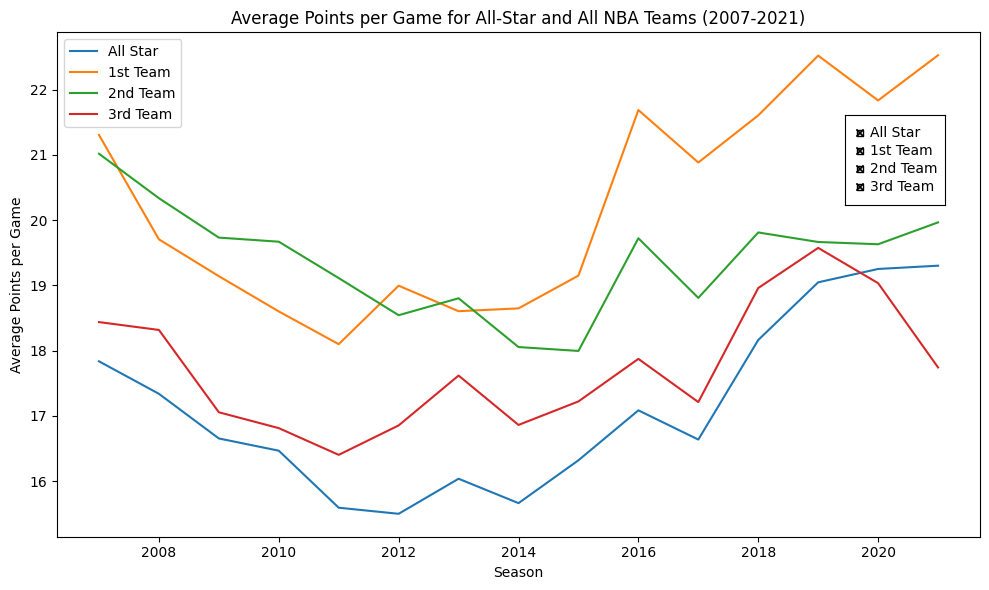

In [13]:
# Objective: 
# Find average number of points in 2007-2021 seasons for
# All NBA First, Second, and Third teams, as well as players that made
# the All-Star Game

# Try to use Pandas, NumPy, Seaborn, and MatPlotLib

import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from matplotlib.widgets import CheckButtons

# Load data
players_stats = pd.read_csv("player_stats.csv")
awards_data = pd.read_csv("awards_data.csv")

# Filter data for the specified seasons (2007-2021)
filter_stats = players_stats[(players_stats['season'] >= 2007) & (players_stats['season'] <= 2021)]

# Identify players who made All-Star Game and All NBA teams
all_star_players = awards_data[awards_data['all_star_game'] == 1]['nbapersonid']
all_nba_1st_team_players = awards_data[awards_data['All NBA First Team'] == 1]['nbapersonid']
all_nba_2nd_team_players = awards_data[awards_data['All NBA Second Team'] == 1]['nbapersonid']
all_nba_3rd_team_players = awards_data[awards_data['All NBA Third Team'] == 1]['nbapersonid']

# Filter player stats data to include only the identified players
all_star_stats = filter_stats[filter_stats['nbapersonid'].isin(all_star_players)]
all_nba_1st_team_stats = filter_stats[filter_stats['nbapersonid'].isin(all_nba_1st_team_players)]
all_nba_2nd_team_stats = filter_stats[filter_stats['nbapersonid'].isin(all_nba_2nd_team_players)]
all_nba_3rd_team_stats = filter_stats[filter_stats['nbapersonid'].isin(all_nba_3rd_team_players)]

# Group player stats by 'nbapersonid' and 'season', and calculate the average points
avg_points_all_star = all_star_stats.groupby(['season'])['points'].sum() / all_star_stats.groupby(['season'])['games'].sum()
avg_points_1st_team = all_nba_1st_team_stats.groupby(['season'])['points'].sum() / all_nba_1st_team_stats.groupby(['season'])['games'].sum()
avg_points_2nd_team = all_nba_2nd_team_stats.groupby(['season'])['points'].sum() / all_nba_2nd_team_stats.groupby(['season'])['games'].sum()
avg_points_3rd_team = all_nba_3rd_team_stats.groupby(['season'])['points'].sum() / all_nba_3rd_team_stats.groupby(['season'])['games'].sum()

# Display average points per game for each category in the terminal
# Utilized zip as a way to align the season and average points to output on the same line and
# have the lists/tuples correspond correctly while utilizing the csv files
print("Average Points per Game for All-Star Players:")
for season, avg_points in zip(avg_points_all_star.index, avg_points_all_star):
    print(f"Season {season}: {avg_points:.1f}")

print("\nAverage Points per Game for All NBA First Team Players:")
for season, avg_points in zip(avg_points_1st_team.index, avg_points_1st_team):
    print(f"Season {season}: {avg_points:.1f}")

print("\nAverage Points per Game for All NBA Second Team Players:")
for season, avg_points in zip(avg_points_2nd_team.index, avg_points_2nd_team):
    print(f"Season {season}: {avg_points:.1f}")

print("\nAverage Points per Game for All NBA Third Team Players:")
for season, avg_points in zip(avg_points_3rd_team.index, avg_points_3rd_team):
    print(f"Season {season}: {avg_points:.1f}")

# Calculate the total average for all seasons combined
total_avg_all_star = avg_points_all_star.mean()
total_avg_1st_team = avg_points_1st_team.mean()
total_avg_2nd_team = avg_points_2nd_team.mean()
total_avg_3rd_team = avg_points_3rd_team.mean()

# Display the total average of all seasons combined for each category
print("\nTotal Average Points per Game for 1st Team: {:.1f}".format(total_avg_1st_team))
print("Total Average Points per Game for 2nd Team: {:.1f}".format(total_avg_2nd_team))
print("Total Average Points per Game for 3rd Team: {:.1f}".format(total_avg_3rd_team))
print("Total Average Points per Game for All-Star: {:.1f}".format(total_avg_all_star))

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the average points per game for each category with line plots
line_all_star, = plt.plot(avg_points_all_star.index, avg_points_all_star.values, label='All Star')
line_1st_team, = plt.plot(avg_points_1st_team.index, avg_points_1st_team.values, label='1st Team')
line_2nd_team, = plt.plot(avg_points_2nd_team.index, avg_points_2nd_team.values, label='2nd Team')
line_3rd_team, = plt.plot(avg_points_3rd_team.index, avg_points_3rd_team.values, label='3rd Team')

# Customize axis labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Average Points per Game')
ax.set_title('Average Points per Game for All-Star and All NBA Teams (2007-2021)')

# Add a legend
ax.legend(loc='upper left')

# Display the plot
plt.tight_layout()

# Create checkboxes to control visibility of distribution lines
rax = plt.axes([0.85, 0.65, 0.1, 0.15])
labels = ('All Star', '1st Team', '2nd Team', '3rd Team')
visibility = [line_all_star.get_visible(), line_1st_team.get_visible(), line_2nd_team.get_visible(), line_3rd_team.get_visible()]
check_buttons = CheckButtons(rax, labels, visibility)

def func(label):
    if label == 'All Star':
        line_all_star.set_visible(not line_all_star.get_visible())
    elif label == '1st Team':
        line_1st_team.set_visible(not line_1st_team.get_visible())
    elif label == '2nd Team':
        line_2nd_team.set_visible(not line_2nd_team.get_visible())
    elif label == '3rd Team':
        line_3rd_team.set_visible(not line_3rd_team.get_visible())
    plt.draw()  # Redraw the plot to reflect changes

# Connect the CheckButtons to the function
check_buttons.on_clicked(func)

plt.show() # Used to display the GUI/graph

<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: <b><u>20.2</b></u> points per game  
2nd Team: <b><u>19.4</b></u> points per game  
3rd Team: <b><u>17.7</b></u> points per game  
All-Star: <b><u>17.1</b></u> points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



Average number of years of experience to win first All NBA selection:

2007: Average: 0.00 | 1st Team: 0.00 | 2nd Team: 0.00 | 3rd Team: 0.00
2008: Average: 0.00 | 1st Team: 0.00 | 2nd Team: 0.00 | 3rd Team: 0.00
2009: Average: 2.00 | 1st Team: 2.00 | 2nd Team: 2.00 | 3rd Team: 0.00
2010: Average: 2.34 | 1st Team: 2.00 | 2nd Team: 2.00 | 3rd Team: 2.52
2011: Average: 2.50 | 1st Team: 0.00 | 2nd Team: 2.50 | 3rd Team: 2.00
2012: Average: 3.39 | 1st Team: 3.39 | 2nd Team: 5.00 | 3rd Team: 2.56
2013: Average: 4.25 | 1st Team: 3.89 | 2nd Team: 2.70 | 3rd Team: 3.67
2014: Average: 3.87 | 1st Team: 4.46 | 2nd Team: 3.56 | 3rd Team: 4.33
2015: Average: 3.30 | 1st Team: 4.00 | 2nd Team: 3.50 | 3rd Team: 3.00
2016: Average: 5.00 | 1st Team: 3.00 | 2nd Team: 4.78 | 3rd Team: 5.41
2017: Average: 3.17 | 1st Team: 0.00 | 2nd Team: 3.00 | 3rd Team: 3.22
2018: Average: 5.83 | 1st Team: 4.00 | 2nd Team: 4.00 | 3rd Team: 7.00
2019: Average: 2.32 | 1st Team: 1.56 | 2nd Team: 3.00 | 3rd Team: 2.67
2020: 

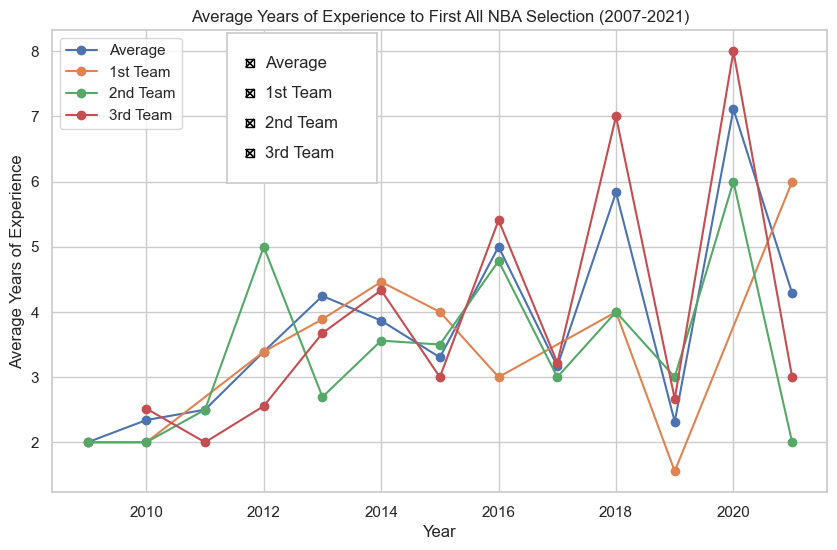

In [3]:
# Objective: 
# Find average number of years experience in 2007 or later seasons for
# players to make All NBA First, Second, and Third teams by searching
# for players drafted in 2007 or later that eventually win at least one
# All NBA selection

# Features to add
#   - Have four choices of 1st team, 2nd team, 3rd team, and average of all teams
#   - Gather the data by checking when the player reached one of those 3 teams for 
#   - the first time in their careers to prevent duplicates

# Try to use Pandas, NumPy, Seaborn, and MatPlotLib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import CheckButtons

# Load data
players_stats = pd.read_csv("player_stats.csv")
awards_data = pd.read_csv("awards_data.csv")

# Filter players who were drafted in 2007 or later
filtered_players_stats = players_stats[players_stats["draftyear"] >= 2007]

# Create a dictionary to store the year of the first All NBA selection for each player
first_all_nba_year = {}

# Iterate through each row in the awards data
for index, row in awards_data.iterrows():
    player_id = row["nbapersonid"]
    year = row["season"]
    if (
        (row["All NBA First Team"] == 1)
        | (row["All NBA Second Team"] == 1)
        | (row["All NBA Third Team"] == 1)
    ):
        if player_id not in first_all_nba_year:
            first_all_nba_year[player_id] = year

# Filter players who didn't win an All NBA selection
filtered_players_stats = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(first_all_nba_year.keys())]

# Calculate the years of experience for each player
filtered_players_stats["first_all_nba_year"] = filtered_players_stats["nbapersonid"].map(first_all_nba_year)
filtered_players_stats["years_of_experience"] = (
    filtered_players_stats["first_all_nba_year"] - filtered_players_stats["draftyear"]
)

# Calculate the average number of years of experience to win the first All NBA selection
average_years_to_first_all_nba = filtered_players_stats.groupby("first_all_nba_year")[
    "years_of_experience"
].mean()

# Calculate the average years of experience for each All-NBA team (1st, 2nd, and 3rd teams)
average_1st_team = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(awards_data[awards_data["All NBA First Team"] == 1]["nbapersonid"])].groupby("first_all_nba_year")["years_of_experience"].mean()
average_2nd_team = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(awards_data[awards_data["All NBA Second Team"] == 1]["nbapersonid"])].groupby("first_all_nba_year")["years_of_experience"].mean()
average_3rd_team = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(awards_data[awards_data["All NBA Third Team"] == 1]["nbapersonid"])].groupby("first_all_nba_year")["years_of_experience"].mean()

# Display the result for each season
print("Average number of years of experience to win first All NBA selection:\n")
for season in range(2007, 2022):
    avg_years_all_nba = average_years_to_first_all_nba.get(season, float("nan"))  # Use get method to handle missing data
    avg_years_1st_team = average_1st_team.get(season, float("nan"))
    avg_years_2nd_team = average_2nd_team.get(season, float("nan"))
    avg_years_3rd_team = average_3rd_team.get(season, float("nan"))
    
    avg_years_all_nba = 0 if pd.isna(avg_years_all_nba) else avg_years_all_nba
    avg_years_1st_team = 0 if pd.isna(avg_years_1st_team) else avg_years_1st_team
    avg_years_2nd_team = 0 if pd.isna(avg_years_2nd_team) else avg_years_2nd_team
    avg_years_3rd_team = 0 if pd.isna(avg_years_3rd_team) else avg_years_3rd_team
    
    print("{}: Average: {:.2f} | 1st Team: {:.2f} | 2nd Team: {:.2f} | 3rd Team: {:.2f}".format(
        season, avg_years_all_nba, avg_years_1st_team, avg_years_2nd_team, avg_years_3rd_team
    ))

# Visualize the distribution of years of experience
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

line_all_nba, = ax.plot(average_years_to_first_all_nba.index, average_years_to_first_all_nba.values, marker='o', label='Average')
line_1st_team, = ax.plot(average_1st_team.index, average_1st_team.values, marker='o', label='1st Team')
line_2nd_team, = ax.plot(average_2nd_team.index, average_2nd_team.values, marker='o', label='2nd Team')
line_3rd_team, = ax.plot(average_3rd_team.index, average_3rd_team.values, marker='o', label='3rd Team')

# Calculate and display the overall, 1st, 2nd and 3rd average
overall_avg = average_years_to_first_all_nba.mean()
average_1st_team = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(awards_data[awards_data["All NBA First Team"] == 1]["nbapersonid"])].groupby("first_all_nba_year")["years_of_experience"].mean()
average_2nd_team = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(awards_data[awards_data["All NBA Second Team"] == 1]["nbapersonid"])].groupby("first_all_nba_year")["years_of_experience"].mean()
average_3rd_team = filtered_players_stats[filtered_players_stats["nbapersonid"].isin(awards_data[awards_data["All NBA Third Team"] == 1]["nbapersonid"])].groupby("first_all_nba_year")["years_of_experience"].mean()

print("\nOverall Average: {:.2f}".format(overall_avg))
print("Average years of experience for 1st Team: {:.2f}".format(average_1st_team.mean()))
print("Average years of experience for 2nd Team: {:.2f}".format(average_2nd_team.mean()))
print("Average years of experience for 3rd Team: {:.2f}".format(average_3rd_team.mean()))
    # print(f"{season}: {avg:.2f}")
    
# print("\nAverage years of experience for 2nd Team:\n")
# for season, avg in average_2nd_team.items():
#     print(f"{season}: {avg:.2f}")
    
# print("\nAverage years of experience for 3rd Team:\n")
# for season, avg in average_3rd_team.items():
#     print(f"{season}: {avg:.2f}")

# Annotate the plot with average values
# def annotate_average(ax, label, avg_values):
#     for year, avg in avg_values.items():
#         if not pd.isna(avg):
#             ax.annotate(f"{label} Avg: {avg:.2f}", xy=(year, avg), xytext=(-30, 8), textcoords="offset points", color="black", fontsize=8)

# annotate_average(ax, 'All NBA', average_years_to_first_all_nba)
# annotate_average(ax, '1st Team', average_1st_team)
# annotate_average(ax, '2nd Team', average_2nd_team)
# annotate_average(ax, '3rd Team', average_3rd_team)
# annotate_average(ax, 'Overall', {year: overall_avg for year in range(2007, 2022)})

# sns.lineplot(
#     x=average_years_to_first_all_nba.index.astype(int),
#     y=average_years_to_first_all_nba.values,
#     marker='o',
#     label='All NBA'
# )
# sns.lineplot(
#     x=average_1st_team.index.astype(int),
#     y=average_1st_team.values,
#     marker='o',
#     label='1st Team'
# )
# sns.lineplot(
#     x=average_2nd_team.index.astype(int),
#     y=average_2nd_team.values,
#     marker='o',
#     label='2nd Team'
# )
# sns.lineplot(
#     x=average_3rd_team.index.astype(int),
#     y=average_3rd_team.values,
#     marker='o',
#     label='3rd Team'
# )
plt.xlabel("Year")
plt.ylabel("Average Years of Experience")
plt.title("Average Years of Experience to First All NBA Selection (2007-2021)")
plt.legend()

# Create checkboxes
rax = plt.axes([0.3, 0.6, 0.15, 0.3], aspect='equal')
check = CheckButtons(rax, ['Average', '1st Team', '2nd Team', '3rd Team'], [True, True, True, True])

# Function to update line visibility
def update_lines(label):
    lines = {'Average': line_all_nba, '1st Team': line_1st_team, '2nd Team': line_2nd_team, '3rd Team': line_3rd_team}
    for team_label, line in lines.items():
        if label == team_label:
            line.set_visible(not line.get_visible())
    
    plt.draw()

check.on_clicked(update_lines)

# Set labels, title, and legend
# plt.xlabel("Year")
# plt.ylabel("Average Years of Experience")
# plt.title("Average Years of Experience to First All NBA Selection (2007-2021)")
# plt.legend()

plt.show()

<strong><span style="color:red">ANSWER 2:</span></strong>  

<b><u>3.80 Years</b></u>

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

Career Outcome Counts:
Elite: 3.0 players.
All-Star: 0.0 players.
Starter: 7.0 players.
Rotation: 8.0 players.
Roster: 13.0 players.
Out of the League: 42.0 players.


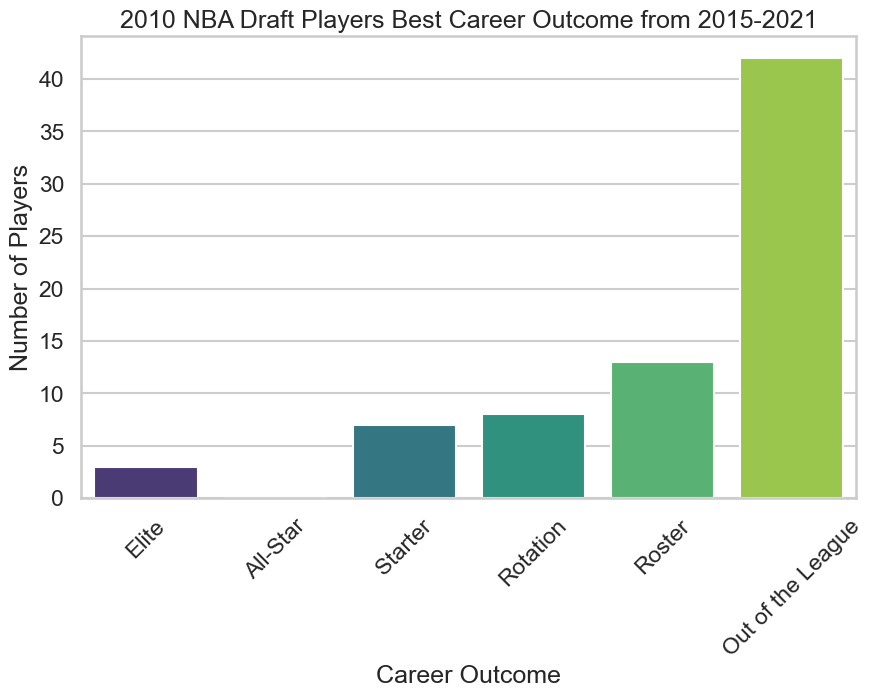

In [12]:
# Objective:
# Data Cleaning Interlude
# Find the Career Outcomes for each player by the following
#   1. Elite (Won any All NBA 1st, 2nd, 3rd, MVP, or DPOY)
#   2. All-Star (Selected as All-Star)
#   3. Starter (Started at least 41 games or played 2000 minutes)
#   4. Rotation (Played at least 1000 minutes)
#   5. Roster (Played at least one minute, but not met any of the top 4 outcomes)
#   6. Out of league (No longer in the NBA)

# Try to use Pandas, NumPy, Seaborn, and MatPlotLib

import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV files
player_stats = pd.read_csv('player_stats.csv')
awards_data = pd.read_csv('awards_data.csv')

# Calculate adjusted minutes and games started for lockout and shortened seasons
def adjust_minutes(row):
    #if row['season'] == 2011:
    #    return row['mins'] * (82/66)
    if row['season'] in [2019, 2020]:
        return round(row['mins'] * (82/72))
    else:
        return row['mins']

def adjust_games_start(row):
    if row['season'] in [2019, 2020]:
        return round(row['games_start'] * (82/72))
    else:
        return row['games_start']

player_stats['adjusted_minutes'] = player_stats.apply(adjust_minutes, axis=1)
player_stats['adjusted_games_start'] = player_stats.apply(adjust_games_start, axis=1)

# Filter data for players from the 2010 draft
players_2010_draft = player_stats[player_stats['draftyear'] == 2010].copy()

# Merge player stats and awards data
merged_data = pd.merge(players_2010_draft, awards_data, on=['season', 'nbapersonid'], how='left')

# Define a function to determine a player's career outcome
def get_career_outcome(row):
    seasons_after_first_four = merged_data[
        (merged_data['nbapersonid'] == row['nbapersonid']) &
        (merged_data['season'] > row['draftyear'] + 3) &
        (merged_data['season'] >= 2015) & (merged_data['season'] <= 2021)
    ]
    
    elite = seasons_after_first_four[seasons_after_first_four[['All NBA First Team', 'All NBA Second Team', 'All NBA Third Team', 'Most Valuable Player_rk']].any(axis=1) |
                                  seasons_after_first_four['Defensive Player Of The Year_rk'].eq(1)]
    
    all_star = seasons_after_first_four[seasons_after_first_four['all_star_game'] == 'TRUE']
    
    starter = seasons_after_first_four[(seasons_after_first_four['adjusted_games_start'] >= round(41 * (82/72))) |
                                       (seasons_after_first_four['adjusted_minutes'] >= round(2000 * (82/72)))]
    
    rotation = seasons_after_first_four[seasons_after_first_four['adjusted_minutes'] >= round(1000 * (82/72))]
    
    # Fetch the number of seasons to trace the player's best career outcome after their 4 years in the NBA
    if len(elite) >= 1:
        return 'Elite'
    elif len(all_star) >= 2:  # Adjusted this line to require at least two All-Star seasons
        return 'All-Star'
    elif len(starter) >= 2:
        return 'Starter'
    elif len(rotation) >= 2:
        return 'Rotation'
    elif len(seasons_after_first_four) >= 2:
        return 'Roster'
    else:
        return 'Out of the League'

# Apply the function to each player's data
players_2010_draft['career_outcome'] = players_2010_draft.apply(get_career_outcome, axis=1)

# Group by player and select the best career outcome
best_career_outcomes = players_2010_draft.groupby('nbapersonid')['career_outcome'].max()

# Define the desired order of career outcomes
outcome_order = ['Elite', 'All-Star', 'Starter', 'Rotation', 'Roster', 'Out of the League']

# Count the number of players in each career outcome bucket
career_outcome_counts = best_career_outcomes.value_counts().reindex(outcome_order).fillna(0)

# Print the career outcome counts
print("Career Outcome Counts:")
for outcome, count in career_outcome_counts.items():
    print(f"{outcome}: {count} players.")

# Plot the results using Seaborn and Matplotlib
sns.set(style='whitegrid', rc={"lines.linewidth": 1.5})
sns.set_context("talk", rc={"font.size": 10})
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=career_outcome_counts.index, y=career_outcome_counts.values, palette='viridis')
plt.title('2010 NBA Draft Players Best Career Outcome from 2015-2021')
plt.xlabel('Career Outcome')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
# plt.bar_label(ax.containers[0])

# Add tooltips to display player names on hover
def hover(event):
    plt.clf()
    sns.set(style='whitegrid')
    ax = sns.barplot(x=career_outcome_counts.index, y=career_outcome_counts.values, palette='viridis')
    plt.title('2010 NBA Draft Players Best Career Outcome from 2015-2021')
    plt.xlabel('Career Outcome')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=45)
    plt.bar_label(ax.containers[0])
    if event.xdata is not None:
        index = int(event.xdata)
        outcome = career_outcome_counts.index[index]
        players_in_category = players_2010_draft[players_2010_draft['career_outcome'] == outcome]['player']
        players_in_category = players_in_category.drop_duplicates()  # Drop duplicate names
        plt.annotate('\n'.join(players_in_category), (index, career_outcome_counts[outcome]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
    plt.tight_layout(pad=0)  # Set pad to 0 to remove tight layout warning
    plt.draw()

fig = plt.gcf()
fig.canvas.mpl_connect('motion_notify_event', hover)

# Display the plot
plt.show()

# Plot the results using Seaborn and Matplotlib
# sns.set(style='whitegrid')
# plt.figure(figsize=(10, 6))
# sns.barplot(x=career_outcome_counts.index, y=career_outcome_counts.values, palette='viridis')
# plt.title('2010 NBA Draft Players Best Career Outcome from 2015-2021')
# plt.xlabel('Career Outcome')
# plt.ylabel('Number of Players')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Display the plot
# plt.show()

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: <u><b>3</b></u> players.  
All-Star: <u><b>0</b></u> players.  
Starter: <u><b>7</b></u> players.  
Rotation: <u><b>8</b></u> players.  
Roster: <u><b>13</b></u> players.  
Out of League: <u><b>42</b></u> players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



------- Career Outcomes -------

Elite: 392
All-Star: 0
Starter: 2678
Rotation: 50
Roster: 1090
Out of the League: 2693

Model Accuracy: 55.68%
Predictions table generated successfully.
Predictions table saved successfully.

------- Sample Outputs -------

Shai Gilgeous-Alexander: Predicted Outcome - Starter, Probabilities - [Elite: 4.65%, All-Star: 21.63%, Starter: 12.96%, Rotation: 0.71%, Roster: 60.04%, Out of the League: 0.00%]

Zion Williamson: Predicted Outcome - Starter, Probabilities - [Elite: 9.22%, All-Star: 25.03%, Starter: 14.30%, Rotation: 2.07%, Roster: 49.39%, Out of the League: 0.00%]

James Wiseman: Predicted Outcome - Starter, Probabilities - [Elite: 5.30%, All-Star: 32.87%, Starter: 16.56%, Rotation: 1.20%, Roster: 44.06%, Out of the League: 0.00%]

Josh Giddey: Predicted Outcome - Starter, Probabilities - [Elite: 7.64%, All-Star: 16.19%, Starter: 14.11%, Rotation: 1.27%, Roster: 60.79%, Out of the League: 0.00%]


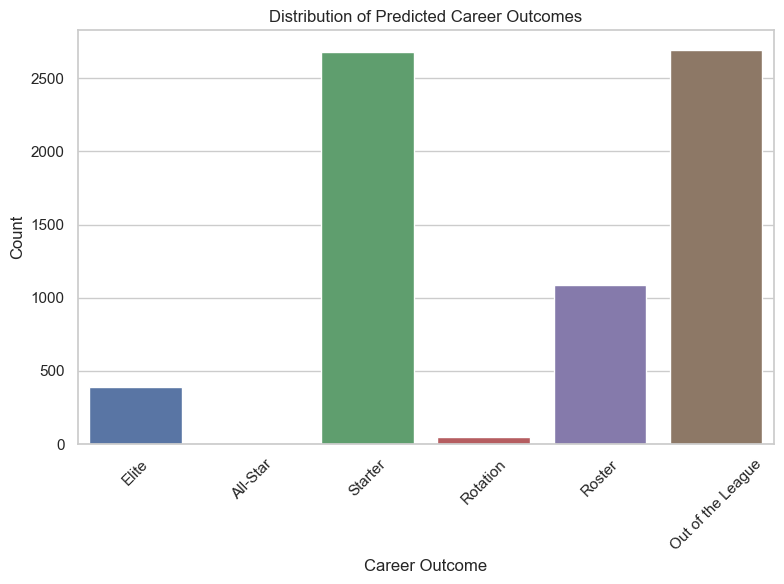

In [7]:
# Objective
# - Do the same setup as the previous question, but from 2015 draft and earlier
# - Players must qualify with All NBA/All Rookie team voting
# - These players must be limited before the 2015 season since the 
#   player must be able to base their career outcome by not counting 
#   the first four years of his career and track the three additional
#   seasons after their first four seasons in the league 
# - Build a model, predicting players drafted from 2018-2021
# - Predict a single career outcome for each player, but predict
#   by using the probability that each player falls into 

# NOTE: I kept more details of the code in a word document within 
# OKC/Datasets/Part1/OpenEndedModelingQuestion/OpenEndedModel.docx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Build a simple predictive model (e.g., Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
player_stats = pd.read_csv('player_stats.csv')
awards_data = pd.read_csv('awards_data.csv')

# Filter data for players drafted in or before the 2015 season
train_data = player_stats[player_stats['draftyear'] <= 2015].copy()

# Merge player stats and awards data
merged_data = pd.merge(train_data, awards_data, on=['season', 'nbapersonid'], how='left')

# Define a function to determine career outcome based on provided criteria
def get_career_outcome(row):
    seasons_after_first_four = merged_data[
        (merged_data['nbapersonid'] == row['nbapersonid']) &
        (merged_data['season'] > row['draftyear'] + 3) &
        (merged_data['season'] >= 2015) & (merged_data['season'] <= 2021)
    ]
    
    elite = seasons_after_first_four[seasons_after_first_four[['All NBA First Team', 'All NBA Second Team', 'All NBA Third Team', 'Most Valuable Player_rk']].any(axis=1) |
                                  seasons_after_first_four['Defensive Player Of The Year_rk'].eq(1)]
    
    all_star = seasons_after_first_four[seasons_after_first_four['all_star_game'] == 'TRUE']
    
    starter = seasons_after_first_four[(seasons_after_first_four['games'] >= round(41 * (82/72))) |
                                       (seasons_after_first_four['mins'] >= round(2000 * (82/72)))]
    
    rotation = seasons_after_first_four[seasons_after_first_four['mins'] >= round(1000 * (82/72))]
    
    # Determine the player's best career outcome after the first four years
    if len(elite) >= 1:
        return 'Elite'
    elif len(all_star) >= 2:
        return 'All-Star'
    elif len(starter) >= 2:
        return 'Starter'
    elif len(rotation) >= 2:
        return 'Rotation'
    elif len(seasons_after_first_four) >= 2:
        return 'Roster'
    else:
        return 'Out of the League'

# Apply the get_career_outcome function to create the target variable
train_data['career_outcome'] = train_data.apply(get_career_outcome, axis=1)

# Display a summary of the career outcomes
career_outcomes_summary = Counter(train_data['career_outcome'])
# print(career_outcomes_summary)
# Print career outcomes summary in the desired format
print("------- Career Outcomes -------\n")
print(f"Elite: {career_outcomes_summary.get('Elite', 0)}")
print(f"All-Star: {career_outcomes_summary.get('All-Star', 0)}")
print(f"Starter: {career_outcomes_summary.get('Starter', 0)}")
print(f"Rotation: {career_outcomes_summary.get('Rotation', 0)}")
print(f"Roster: {career_outcomes_summary.get('Roster', 0)}")
print(f"Out of the League: {career_outcomes_summary.get('Out of the League', 0)}")


# Update the features list based on the available columns
features = ['mins', 'fgm', 'fga', 'fgp', 'fgm3', 'fga3', 'fgp3']  # Adjust this list based on your available columns
target = 'career_outcome'

# Split data into features (X) and target (y)
X = train_data[features]
y = train_data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values and scale the data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the model
total_players = player_stats['player'].nunique()
model = LogisticRegression(max_iter=total_players, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict career outcomes on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Filter data for players drafted in 2018-2021
test_data = player_stats[player_stats['draftyear'].isin(range(2018, 2022))].copy()

# Select features for the test data
X_test = test_data[features]

# Predict career outcomes for test data
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)
test_predictions = model.predict(X_test_scaled)
test_predictions_proba = model.predict_proba(X_test_scaled)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({'Player': test_data['player'], 'Predicted Outcome': test_predictions})

# Drop duplicates from the DataFrame (keep only the first occurrence of each player)
predictions_df = predictions_df.drop_duplicates(subset='Player', keep='first')

# Convert DataFrame to HTML table with a CSS class for hiding duplicates
predictions_table_html = predictions_df.to_html(index=False, classes='hide-duplicates')

# Print a success message
print("Predictions table generated successfully.")

# Define the full file path for the HTML predictions table
predictions_table_path = 'Part1/OpenEndedModelingQuestion/predictions_table.html'

# Initialize a set to keep track of processed players
seen_players = set()

# Open the existing HTML file in append mode
with open(predictions_table_path, 'a', encoding='utf-8') as f:
    # Write the new predictions HTML table to the file
    f.write(predictions_table_html)

    # Print a success message
    print("Predictions table saved successfully.")

    # Print predictions for selected players
    selected_players = ['Shai Gilgeous-Alexander', 'Zion Williamson', 'James Wiseman', 'Josh Giddey']
    print("\n------- Sample Outputs -------")

    for player, prediction, probabilities in zip(test_data['player'], test_predictions, test_predictions_proba):
        if player in selected_players and player not in seen_players:
            seen_players.add(player)
            elite_prob = f"{probabilities[0] * 100:.2f}%"
            all_star_prob = f"{probabilities[1] * 100:.2f}%"
            starter_prob = f"{probabilities[2] * 100:.2f}%"
            rotation_prob = f"{probabilities[3] * 100:.2f}%"
            roster_prob = f"{probabilities[4] * 100:.2f}%"
            out_of_league_prob = f"{(1 - sum(probabilities[:5])) * 100:.2f}%"
            print(f"\n{player}: Predicted Outcome - {prediction}, Probabilities - [Elite: {elite_prob}, All-Star: {all_star_prob}, Starter: {starter_prob}, Rotation: {rotation_prob}, Roster: {roster_prob}, Out of the League: {out_of_league_prob}]")

            # Append the player's information to the HTML table if not already present
            if player not in seen_players:
                seen_players.add(player)
                if player in selected_players:
                    # Add a CSS class to hide duplicate rows
                    predictions_table_html += f"<tr class='duplicate'><td>{player}</td><td>{prediction}</td></tr>\n"
                else:
                    predictions_table_html += f"<tr><td>{player}</td><td>{prediction}</td></tr>\n"

# Create a bar plot of predicted career outcomes
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='career_outcome', order=['Elite', 'All-Star', 'Starter', 'Rotation', 'Roster', 'Out of the League'])
plt.title('Distribution of Predicted Career Outcomes')
plt.xlabel('Career Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

Average Offensive Rebound Percent for OKC: 28.9%
Predicted Offensive Rebound Percent for Game 81: 28.9%


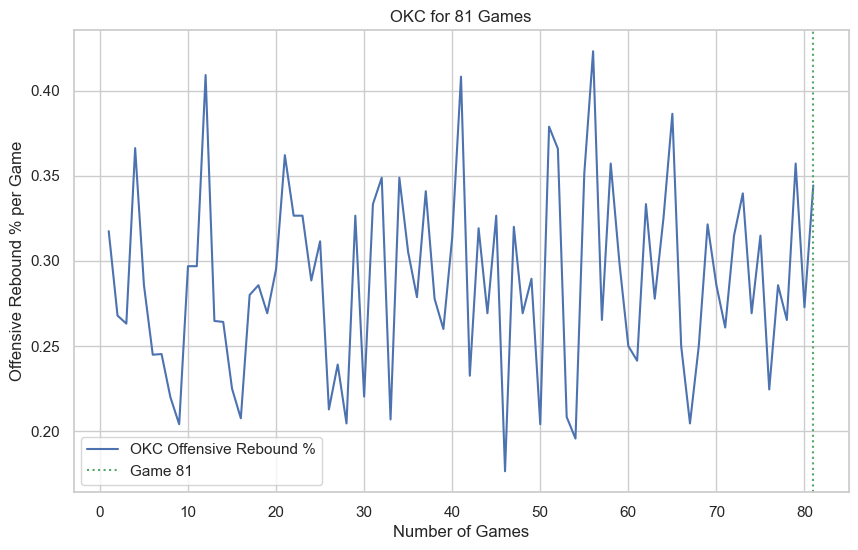

In [5]:
# Objective:
#   - Use the rebounding_data csv file to predict a team's next game
#   offensive rebounding percentage from prior games
#   - Single game = (# of Off_reb) / (# of Off_reb chances)
#   - Multiple games = (total of Off_reb) / (total of Off_reb chances)
#   - Calculate OKC's predicted Off_reb percent in GAME 81

import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
rebounding_data = pd.read_csv('team_rebounding_data_22.csv')

# Filter data for OKC (Oklahoma City Thunder)
okc_data = rebounding_data[rebounding_data['team'] == 'OKC']

# Calculate average offensive rebounding percent
average_oreb_pct = okc_data['offensive_rebounds'].sum() / okc_data['off_rebound_chances'].sum()

# Print the calculated average
print("Average Offensive Rebound Percent for OKC:", '{:.1%}'.format(average_oreb_pct))

# Predict offensive rebound percent for game 81 using the average
predicted_oreb_pct = average_oreb_pct

print("Predicted Offensive Rebound Percent for Game 81:", '{:.1%}'.format(predicted_oreb_pct))

# Visualize the data using Seaborn and Matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Exclude game 82 from the plot
okc_data_no_game_82 = okc_data[okc_data['game_number'] != 82]
sns.lineplot(x=okc_data_no_game_82['game_number'], y=okc_data_no_game_82['oreb_pct'], label='OKC Offensive Rebound %')

# Add a vertical line for game 81
game_81_x = okc_data[okc_data['game_number'] == 81]['game_number'].values[0]
plt.axvline(x=game_81_x, color='g', linestyle=':', label='Game 81')

plt.title("OKC for 81 Games")
plt.xlabel("Number of Games")
plt.ylabel("Offensive Rebound % per Game")
plt.legend()
plt.show()

<strong><span style="color:red">ANSWER 1:</span></strong>  

<b><u>28.9%</b></u>

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  

<b><u>
To improve the precision of the initial model when forecasting a team's offensive rebound percentage while accommodating the absence of players, various strategies can be explored. These methodologies aim to mitigate the limitations arising from the non-participation of key contributors in forthcoming games.

First and foremost, adopting a player-centric analysis approach could yield substantial benefits. Delving into the specific statistics of individual players, particularly those linked to offensive rebounding, enables the model to pinpoint noteworthy contributors to this aspect of the game. This method facilitates the integration of player-specific data, thereby enhancing the accuracy of predictions by accounting for the influence of the absence of essential players due to factors such as injuries.

An extension of this strategy involves the evaluation of player-specific metrics. These metrics might encompass aspects like offensive rebounding rate, total rebounds, or historical performance in games played without certain pivotal players. By incorporating the performance of individual players in the absence of others, the model can offer predictions that are more intricate and detailed.

Furthermore, delving into historical lineup combinations and their corresponding offensive rebounding rates can unveil insights into potential alterations in team dynamics due to player unavailability. By assimilating such data, the model can adapt its predictions based on the distinctive characteristics of specific player combinations.

Considering the strengths and weaknesses of opponents presents another avenue for refinement. Analyzing the defensive capabilities of the opposing team, particularly in the context of rebounding, can facilitate the anticipation of potential changes in offensive rebounding performance.

Leveraging recent performance data can also augment prediction accuracy. Assigning greater significance to more recent games enables the model to capture evolving trends or shifts in team dynamics that could influence offensive rebounding, especially in scenarios involving the absence of specific players.

While the original model lays a strong foundation, the introduction of machine learning algorithms has the potential to further enhance predictive capabilities. These algorithms can accommodate a wide array of inputs, encompassing factors such as player availability, opponent strengths, historical performance, and contextual variables. As a result, the predictions become more comprehensive and insightful.

The integration of real-time injury reports and up-to-the-minute news updates constitutes an innovative approach that considers the dynamic nature of player availability. By incorporating the latest information, the model can dynamically adjust predictions to align with the current state of the team.

Advanced metrics, which consider player interactions and on-court impact, offer a more refined perspective. These metrics can quantify the effect of a specific player's absence on offensive rebounding performance, adding sophistication to the model's predictions.

Simulations offer an additional avenue for addressing this challenge. Employing simulations based on various scenarios of player availability, the model can generate a spectrum of potential outcomes for offensive rebounding percentage, providing a comprehensive overview of potential results.

Lastly, soliciting insights from domain experts elevates the accuracy of the model. These experts can offer valuable perspectives on the intricate dynamics of player interactions and how the absence of specific individuals may influence offensive rebounding.

The incorporation of these diverse strategies into the original model culminates in a more robust and precise predictive tool for team offensive rebound percentage. This adaptation takes into account the complexities arising from absent players and yields predictions that are more well-informed and insightful.</b></u>

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>  


<strong><span style="font-size: 30px">Potential Weaknesses of the Simple Average Model:</span></strong>

<b><u>
While the simplicity of the average model provides a clear approach, it does come with certain limitations that can impact prediction accuracy. One notable limitation is its exclusion of contextual factors that significantly influence offensive rebounding performance. By solely relying on historical offensive rebounding percentages, the model overlooks crucial elements such as changes in playing style, opponent strengths, player roles, and game-specific dynamics. To enhance predictive accuracy, a more sophisticated strategy is warranted – one that encompasses a wider range of features to account for the complex interplay of variables affecting rebounding outcomes.

Another potential weakness of the simple average model is its uniform treatment of all games, regardless of potential variations or anomalies in the data. This uniform approach may not adequately consider exceptional circumstances or events that can lead to substantial deviations in offensive rebounding performance. A potential solution involves the implementation of statistical techniques, such as robust averaging or weighted averaging based on game significance. These methods can mitigate the impact of extreme values and provide a more stable and representative prediction.

Furthermore, the simple average model assumes a linear relationship between historical offensive rebounding percentages and future performance. However, real-world rebounding behavior often exhibits non-linear patterns and interactions among different variables. Overcoming this limitation involves adopting more advanced modeling techniques, such as regression analysis or machine learning algorithms. These approaches enable the model to capture intricate relationships, potentially resulting in more accurate predictions.</b></u>

<hr></hr>

<strong><span style="font-size: 30px">Overall Modeling Methodology:</span></strong>

<b><u>
To comprehensively address these potential weaknesses and enhance the model's predictive prowess, a holistic modeling methodology is recommended. This comprehensive approach encompasses several key components that collectively contribute to a refined and accurate prediction.

Beginning with feature engineering, an essential foundation is laid through the creation of an enriched feature set. These features should encompass a diverse array of player-specific attributes, team dynamics, opponent characteristics, and contextual factors. By incorporating this broad range of features, the model gains a nuanced understanding of the game's intricacies, leading to predictions that align more closely with actual outcomes.

The utilization of machine learning algorithms constitutes another core element of this methodology. Algorithms such as regression models, decision trees, random forests, and neural networks possess the capability to unravel complex relationships within the data. This enables the identification of non-linear patterns and interactions that a simple average model might overlook, thereby enhancing predictive accuracy.

Incorporating regularization techniques further bolsters the modeling process. Regularization, in the form of L1 and L2 regularization, serves to prevent overfitting by controlling the influence of noisy or irrelevant features. This ensures that the model remains focused on the most pertinent predictors, contributing to robust predictions.

The inclusion of dynamic updating mechanisms, featuring real-time data updates, injects adaptability into the model. By integrating information such as injury reports, player availability, and game-specific details, the model can make real-time adjustments, ensuring the continued relevance and accuracy of predictions up to game time.

Lastly, the power of ensemble methods is harnessed. Through techniques like stacking or boosting, the integration of multiple models – each addressing different facets of the prediction – results in a fusion of insights. This ensemble approach produces a prediction that capitalizes on the strengths of individual models, culminating in a more accurate and dependable final result.

Embracing this comprehensive modeling methodology offers a multifaceted solution to the limitations of the simple average model. By incorporating advanced techniques, leveraging a diverse set of features, and embracing real-time adaptability, the prediction of team offensive rebound percentage becomes more robust, accurate, and attuned to the intricacies of basketball dynamics.</b></u>